# Lasso & Ridge Regression

<img src="https://i.imgur.com/nKW0pM3.png" height=700 width=700>

## Load the Data

In [63]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
od.download('https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset')

100%|█████████████████████████████████████████| 141k/141k [00:00<00:00, 210kB/s]

In [287]:
df = pd.read_csv('car-price-prediction-dataset/cardekho.csv')

In [288]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


## Clean the Data

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [289]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [293]:
df['seats'].mode()[0]

5.0

In [ ]:
- replace seats with mode - 5
## - replace seats with minimum - 2 
- replace seats with 4

In [291]:
df['seats'] = df['seats'].fillna(4)

In [ ]:
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [292]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                   0
dtype: int64

In [295]:
df['engine'].mode()[0]

1248.0

In [296]:
## df['engine'].max()

3604.0

In [297]:
df['engine'].min()

624.0

In [294]:
df['engine'].value_counts()

1248.0    1017
1197.0     832
998.0      453
796.0      444
2179.0     389
          ... 
2835.0       1
1489.0       1
1422.0       1
2496.0       1
1950.0       1
Name: engine, Length: 121, dtype: int64

In [130]:
#df['seats'].min()

In [131]:
#df['seats'] = df['seats'].fillna(df['seats'].min())

In [132]:
#df.engine.value_counts()

In [133]:
#df['engine'].mode()[0]

In [298]:
df['engine'] = df['engine'].fillna(df['engine'].mode()[0])

In [299]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                  0
max_power             215
seats                   0
dtype: int64

In [135]:
#df['mileage(km/ltr/kg)'].mean()

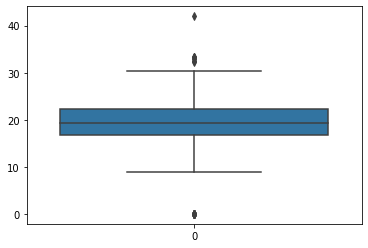

In [302]:
sns.boxplot(df['mileage(km/ltr/kg)']);

In [303]:
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

In [304]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [305]:
sns.boxplot(df['max_power'])

ValueError: could not convert string to float: ''

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               8128 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [307]:
df['max_power'] = df['max_power'].str.strip()

In [308]:
sns.boxplot(df['max_power'])

ValueError: could not convert string to float: ''

In [ ]:
.strip()

In [ ]:
"4.56 " - "4.56"

In [ ]:
""

In [309]:
df['max_power'] = df['max_power'].replace('', np.nan)

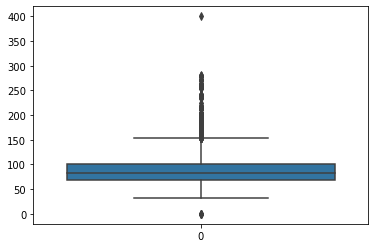

In [311]:
sns.boxplot(df['max_power']);

In [332]:
# Convert the column to float
df['max_power'] = df['max_power'].astype(float)

In [333]:
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

In [334]:
df.isna().sum()

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
brand                 0
model                 0
dtype: int64

## Feature Engineering

In [314]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [317]:
df['name'][0].split()[0]

'Maruti'

In [318]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])

In [319]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,Tata


In [325]:
' '.join(['Swift', 'Dzire', 'VDI'])

'Swift Dzire VDI'

In [324]:
' '.join(df['name'][0].split()[1:])

'Swift Dzire VDI'

In [321]:
' '.join(df['name'][0].split()[1:])

'Swift Dzire VDI'

In [ ]:
def fun_name(parameters):
    #logic using parameters
    return final_value

In [326]:
df['model'] = df['name'].apply(lambda x: ' '.join(x.split()[1:]))

In [327]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,i20 Magna
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,Hyundai,Verna CRDi SX
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0,Maruti,Swift Dzire ZDi
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,Tata,Indigo CR4


In [328]:
df.drop('name',axis=1,inplace=True)

In [329]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,i20 Magna
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,Hyundai,Verna CRDi SX
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0,Maruti,Swift Dzire ZDi
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,Tata,Indigo CR4


## Data Analysis & Visualization

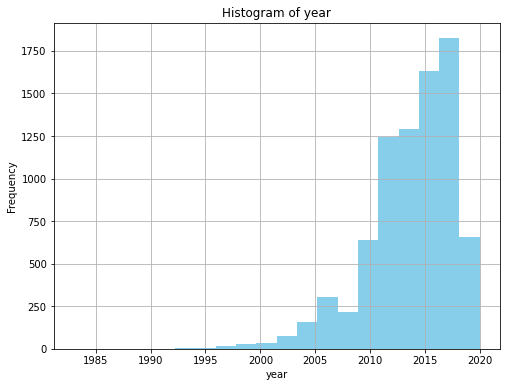

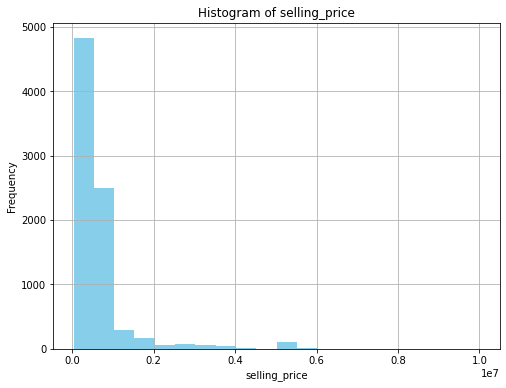

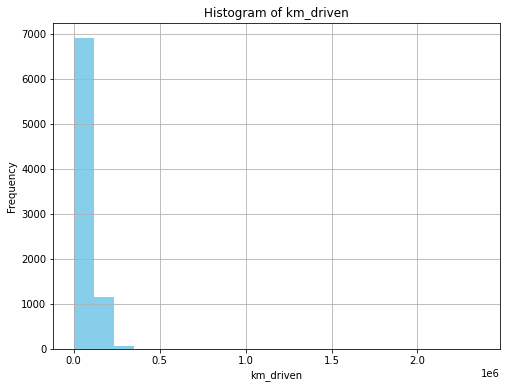

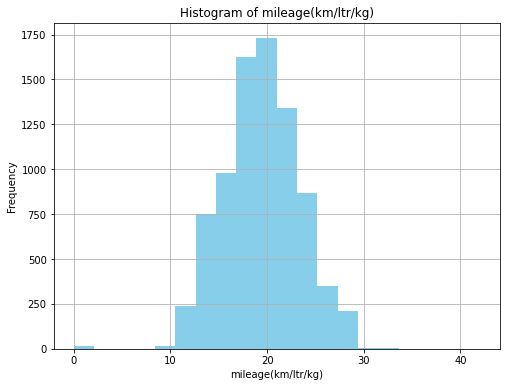

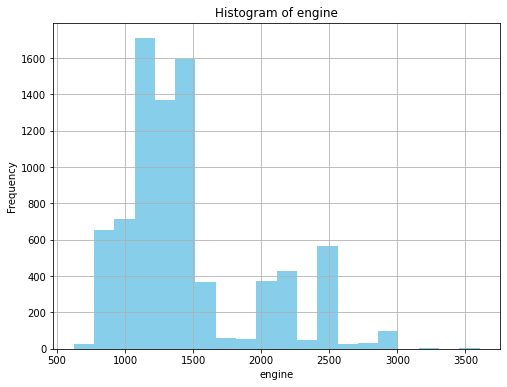

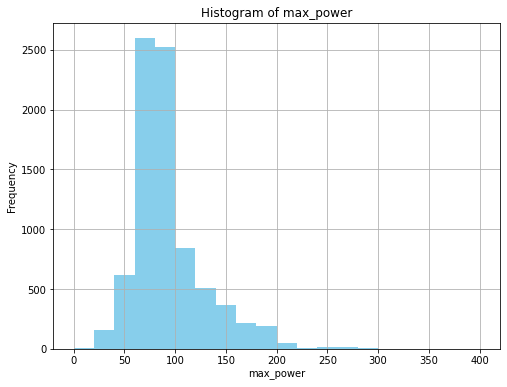

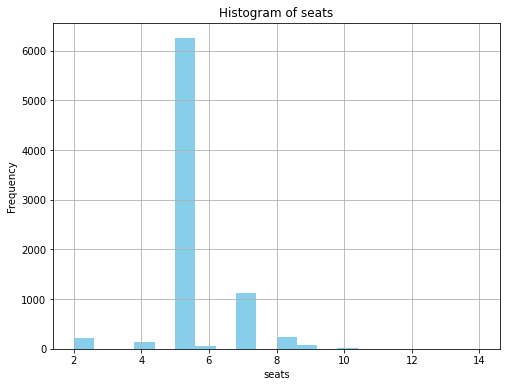

In [60]:
import matplotlib.pyplot as plt

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

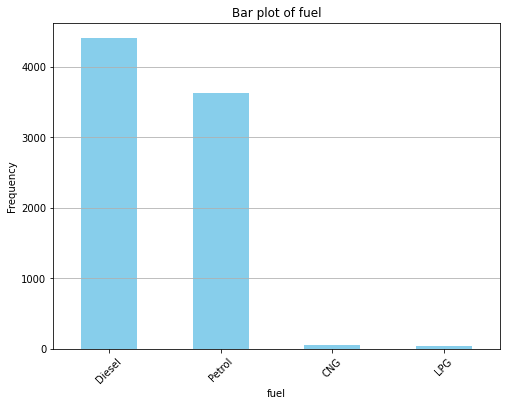

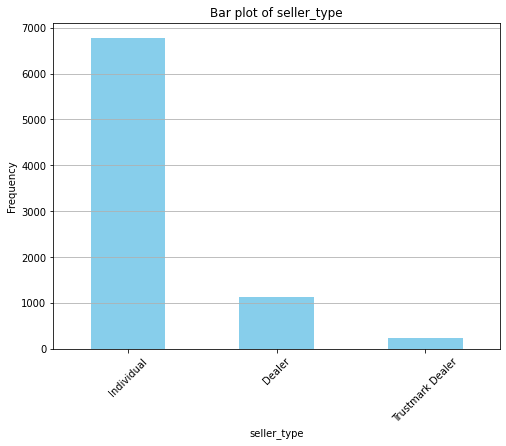

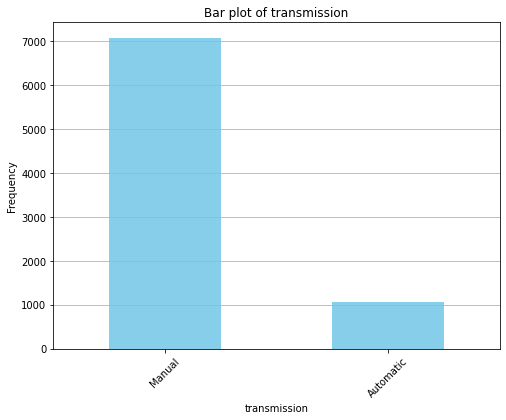

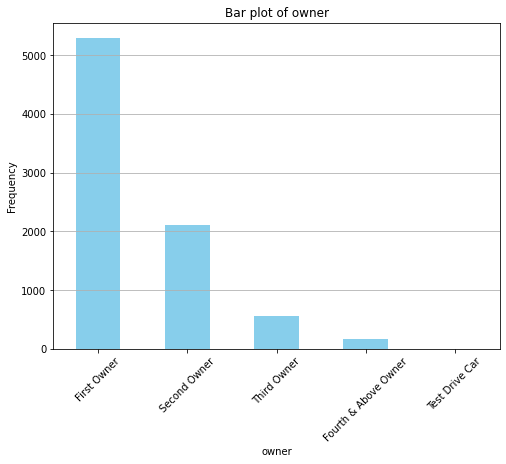

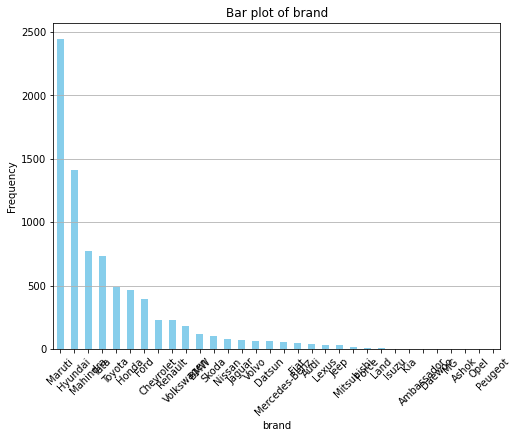

In [62]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting bar plots for categorical columns
for column in categorical_columns[:-1]:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8128 non-null   int64  
 1   selling_price       8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   object 
 10  seats               8128 non-null   float64
 11  brand               8128 non-null   object 
 12  model               8128 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [335]:
df.corr()

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.310383,0.035851,0.224704,0.053956
selling_price,0.414092,1.000000,-0.225534,-0.125454,0.458345,0.747935,0.060123
km_driven,-0.418006,-0.225534,1.000000,-0.171426,0.198911,-0.040599,0.203093
mileage(km/ltr/kg),0.310383,-0.125454,-0.171426,1.000000,-0.574469,-0.373165,-0.439254
engine,0.035851,0.458345,0.198911,-0.574469,1.000000,0.703612,0.607850
max_power,0.224704,0.747935,-0.040599,-0.373165,0.703612,1.000000,0.198586
seats,0.053956,0.060123,0.203093,-0.439254,0.607850,0.198586,1.000000


/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/2460615548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


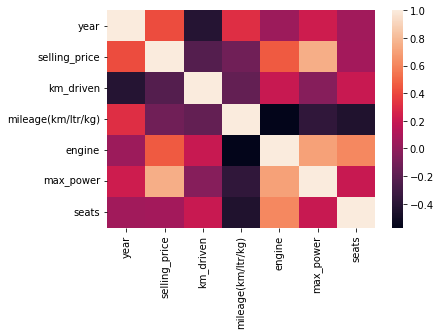

In [336]:
sns.heatmap(df.corr());

> A correlation matrix, which is a way of visually representing the relationships between different numerical variables.

- In the above graph, each variable is listed on the top and left side. The center of the table shows the correlation coefficient between each pair of variables. 
- The correlation coefficient is a number between -1 and 1 that indicates how strong the relationship is between two variables. 
- A correlation coefficient of 1 means that the two variables are perfectly positively correlated, meaning that as the value of one variable increases, the value of the other variable also increases. 
- A correlation coefficient of -1 means that the two variables are perfectly negatively correlated, meaning that as the value of one variable increases, the value of the other variable decreases. 
- A correlation coefficient of 0 means that there is no linear relationship between the two variables.
- The color coding in the center of the table helps to visualize the correlation coefficients. Generally, a red color indicates a positive correlation, and a blue color indicates a negative correlation. The intensity of the color indicates the strength of the correlation.
- For example, in the above graph, the correlation coefficient between "selling_price" and "max_power" is ~0.8. This indicates that there is a strong positive correlation between the selling price of a car and its max_power. In other words,cars with higher maximum horsepower tend to sell for more money.

In [147]:
numerical_columns = list(df.select_dtypes(include=['float64', 'int64']).columns)

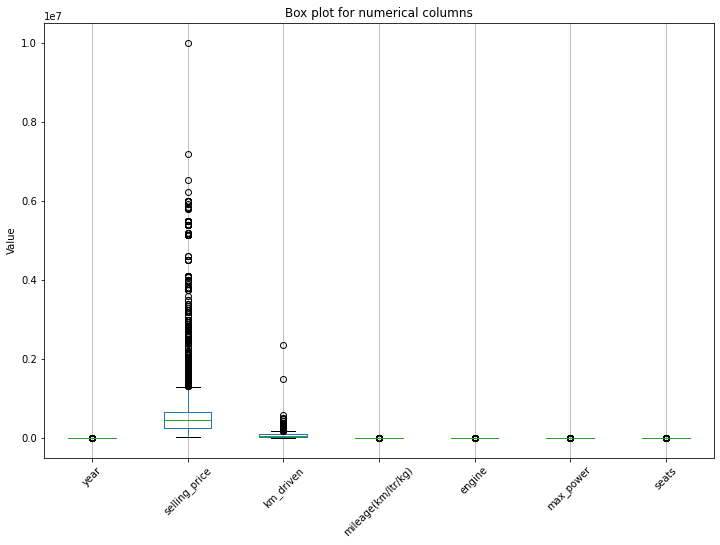

In [75]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 8))
df.boxplot(column=numerical_columns)
plt.title('Box plot for numerical columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Split the Data

In [337]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,i20 Magna
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai,Verna CRDi SX
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,Maruti,Swift Dzire ZDi
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,Tata,Indigo CR4


In [339]:
from sklearn.model_selection import train_test_split

In [340]:
train_val_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

In [341]:
train_df,val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [342]:
train_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
8009,2006,145000,80000,Petrol,Individual,Manual,Second Owner,19.418783,1248.0,82.0,4.0,Hyundai,Santro Xing XS eRLX Euro III
7533,2017,295000,15000,Petrol,Individual,Manual,First Owner,24.700000,796.0,47.3,5.0,Maruti,Alto 800 LXI
4519,2011,260000,110000,Diesel,Individual,Manual,Second Owner,17.800000,1399.0,68.0,5.0,Ford,Fiesta EXi 1.4 TDCi Ltd
3253,2011,325000,142000,Diesel,Individual,Manual,First Owner,15.960000,2523.0,62.1,7.0,Mahindra,Bolero 2011-2019 SLX
7453,2019,466000,25000,Petrol,Individual,Automatic,Fourth & Above Owner,20.300000,1086.0,68.0,5.0,Hyundai,Santro Sportz AMT BSIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,2018,681000,27000,Diesel,Individual,Manual,First Owner,20.140000,1498.0,88.0,5.0,Volkswagen,Polo 2015-2019 1.5 TDI Highline Plus
1908,2009,280000,40000,Petrol,Individual,Automatic,Third Owner,12.900000,1799.0,130.0,5.0,Honda,Civic 1.8 V AT
4234,2017,2711000,9000,Diesel,Dealer,Automatic,First Owner,13.600000,1999.0,177.0,5.0,Jaguar,XE 2016-2019 2.0L Diesel Prestige
523,2017,425000,42000,Petrol,Individual,Manual,First Owner,23.840000,1199.0,84.0,5.0,Tata,Tiago 1.2 Revotron XZ


In [343]:
val_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
5743,2017,430000,20000,Petrol,Individual,Manual,Second Owner,18.15,1198.0,82.00,6.0,Mahindra,KUV 100 mFALCON G80 K8 Dual Tone
3594,2011,450000,96000,Diesel,Individual,Manual,Fourth & Above Owner,22.32,1582.0,126.32,5.0,Hyundai,Verna 1.6 SX
4139,2017,700000,70000,Diesel,Individual,Manual,First Owner,25.83,1498.0,99.00,5.0,Ford,Figo Aspire 1.5 TDCi Titanium
7558,2010,350000,90000,Diesel,Individual,Manual,Second Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 1.4 CRDi Era
4809,2011,225000,20000,Petrol,Individual,Manual,First Owner,18.90,998.0,67.10,5.0,Maruti,Wagon R VXI BS IV with ABS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,2011,300000,60000,Petrol,Individual,Manual,Second Owner,18.06,1198.0,75.00,5.0,Nissan,Micra XV
4651,2018,850000,120000,Diesel,Individual,Manual,Second Owner,17.00,2650.0,80.84,7.0,Force,One EX
170,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400.00,4.0,Volvo,XC90 T8 Excellence BSIV
4154,2014,250000,40000,Petrol,Individual,Manual,Second Owner,22.74,796.0,47.30,5.0,Maruti,Alto 800 LXI


In [344]:
test_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
1971,2004,198000,110000,Petrol,Individual,Manual,Third Owner,12.80,1493.0,100.00,5.0,Honda,City 1.5 GXI
4664,2014,500000,291977,Diesel,Individual,Manual,First Owner,14.00,2179.0,138.10,7.0,Tata,Safari Storme EX
5448,2016,425000,70000,Diesel,Individual,Manual,First Owner,23.20,1248.0,73.94,5.0,Maruti,Ritz VDi
3333,2006,150000,120000,Petrol,Individual,Manual,Second Owner,16.90,1497.0,100.00,5.0,Honda,City 2017-2020 VTEC
2316,2013,525000,69000,Diesel,Individual,Manual,Second Owner,22.90,1248.0,74.00,5.0,Maruti,Swift VDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,5.0,BMW,X4 M Sport X xDrive20d
5002,2017,370000,40000,Petrol,Individual,Manual,First Owner,20.89,1197.0,81.80,5.0,Maruti,Ignis 1.2 Delta BSIV
6008,2014,374000,54043,Petrol,Dealer,Automatic,First Owner,18.90,1197.0,81.86,5.0,Hyundai,Grand i10 AT Sportz
2283,2018,575000,70000,Petrol,Individual,Manual,First Owner,17.00,1198.0,108.50,5.0,Tata,Nexon 1.2 Revotron XM


In [148]:
df['year'].value_counts()

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: year, dtype: int64

In [149]:
train_df = df[df['year']<2018]

In [150]:
val_df = df[(df['year']==2018) | (df['year']==2019)]

In [151]:
test_df = df[df['year']==2020]

In [346]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand', 'model'],
      dtype='object')

In [350]:
inputs = ['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand', 'model']

In [351]:
inputs

['year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage(km/ltr/kg)',
 'engine',
 'max_power',
 'seats',
 'brand',
 'model']

In [349]:
list(df[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand', 'model']].columns)

['year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage(km/ltr/kg)',
 'engine',
 'max_power',
 'seats',
 'brand',
 'model']

In [352]:
inputs = list(df[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand', 'model']].columns)

output = 'selling_price'

In [353]:
train_inputs = train_df[inputs]
train_target = train_df[output]

In [354]:
val_inputs = val_df[inputs]
val_target = val_df[output]

In [355]:
test_inputs = test_df[inputs]
test_target = test_df[output]

## Preprocess the Data

### Scaling

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
numerics = list(df[inputs].select_dtypes(np.number).columns)

In [358]:
scaler = StandardScaler()

In [359]:
scaler.fit(df[numerics])

StandardScaler()

In [360]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4072025852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerics] = scaler.transform(train_inputs[numerics])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4072025852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numerics] = scaler.transform(val_inputs[numerics])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4072025852.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [163]:
train_inputs[numerics]

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats
0,0.048464,1.338363,0.999896,-0.411305,-0.488067,-0.295059
1,0.048464,0.887411,0.432289,0.090536,0.346439,-0.295059
2,-1.929775,1.241098,-0.431678,0.088528,-0.374990,-0.295059
3,-0.940656,1.011202,0.899435,-0.114215,-0.035760,-0.295059
4,-1.682495,0.887411,-0.833524,-0.310937,-0.086645,-0.295059
...,...,...,...,...,...,...
8123,-0.198816,0.710567,-0.230756,-0.513680,-0.237885,-0.295059
8124,-1.682495,0.869726,-0.657716,0.080499,0.529624,-0.295059
8125,-1.187935,0.887411,-0.029833,-0.411305,-0.490894,-0.295059
8126,-0.198816,-0.792605,1.042592,-0.114215,-0.601144,-0.295059


### Encoding

In [361]:
from sklearn.preprocessing import OneHotEncoder

In [362]:
categoricals = train_inputs.select_dtypes('object').columns.tolist()

In [363]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categoricals])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [364]:
encoded_cols = list(encoder.get_feature_names_out(categoricals))

In [365]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmente

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmente

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmente

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmente

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmente

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:1: PerformanceWarning: DataFrame is highly fragmente

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:2: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_5552/4099229682.py:3: PerformanceWarning: DataFrame is highly fragmented.  

In [368]:
len(df.model.value_counts())

2058

In [170]:
train_inputs[encoded_cols]

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Petrol CVT Asta,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz AT 1.4,model_i20 Sportz Diesel,model_i20 Sportz Option 1.2,model_i20 Sportz Option 1.4 CRDi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8124,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8125,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8126,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [369]:
train_inputs = train_inputs[numerics + encoded_cols]
val_inputs = val_inputs[numerics + encoded_cols]
test_inputs = test_inputs[numerics + encoded_cols]

In [ ]:
linear regression - y = mx + c - OLS
Ridge - y = mx + c - Gradient Descent - MSE + lambda * (sum of squared coef)
Lasso - y = mx + c - Gradient Descent - MSE + lambda * (sum of absolute coef)
DecisionTree Regressor - Entropy/Information Gain - value
RandomForest Regressor - Group of decision trees - average of each tree - predicts the target
XGBoost Regressor - Group of decision trees - average of each tree - predicts the error

## Fit the Model

### Linear Regression

In [370]:
from sklearn.linear_model import LinearRegression

In [371]:
lin_model = LinearRegression()

In [372]:
lin_model.fit(train_inputs, train_target)

LinearRegression()

In [373]:
train_preds = lin_model.predict(train_inputs)
val_preds = lin_model.predict(val_inputs)

In [214]:
from sklearn.metrics import mean_squared_error as mse

In [374]:
from sklearn.metrics import r2_score

In [375]:
mse(train_target, train_preds,squared=False)

75362.14921393059

In [376]:
r2_score(train_target, train_preds)

0.9912798247433895

In [377]:
mse(val_target, val_preds,squared=False)

2.0875162999546504e+16

In [378]:
r2_score(val_target, val_preds)

-6.804877578544297e+20

In [224]:
df['selling_price'].describe()

count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

### Lasso Regression

In [379]:
from sklearn.linear_model import Lasso

In [380]:
model = Lasso()

In [381]:
model.fit(train_inputs, train_target)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+13, tolerance: 3.176e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [382]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [383]:
mse(train_target, train_preds,squared=False)

75290.2697868211

In [385]:
r2_score(train_target, train_preds)

0.9912964511875899

In [384]:
mse(val_target, val_preds,squared=False)

256394.15104485673

In [386]:
r2_score(val_target, val_preds)

0.897345783326811

### Ridge Regression

In [387]:
from sklearn.linear_model import Ridge

In [388]:
model = Ridge()

In [389]:
model.fit(train_inputs, train_target)

Ridge()

In [390]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [391]:
mse(train_target, train_preds,squared=False)

112979.77681747661

In [392]:
r2_score(train_target, train_preds)

0.9804016239031436

In [393]:
mse(val_target, val_preds,squared=False)

245298.42423930095

In [394]:
r2_score(val_target, val_preds)

0.9060384693828579

### Decision Tree Regressor

In [395]:
from sklearn.tree import DecisionTreeRegressor

In [396]:
model = DecisionTreeRegressor()

In [397]:
model.fit(train_inputs, train_target)

DecisionTreeRegressor()

In [398]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [399]:
mse(train_target, train_preds,squared=False)

9530.243550611254

In [400]:
r2_score(train_target, train_preds)

0.9998605473853385

In [401]:
mse(val_target, val_preds,squared=False)

216208.08319309045

In [402]:
r2_score(val_target, val_preds)

0.9270030996680331

### Random Forest Regressor

In [403]:
from sklearn.ensemble import RandomForestRegressor

In [404]:
model = RandomForestRegressor()

In [405]:
model.fit(train_inputs, train_target)

RandomForestRegressor()

In [406]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [407]:
mse(train_target, train_preds,squared=False)

52543.12076692186

In [408]:
r2_score(train_target, train_preds)

0.995761127142197

In [409]:
mse(val_target, val_preds,squared=False)

195590.1565194982

In [410]:
r2_score(val_target, val_preds)

0.9402614668570527

In [238]:
#from xgboost import XGBRegressor

## Hyperparameter Tuning

In [510]:
model = RandomForestRegressor(max_depth=30 , random_state=40)

In [511]:
model.fit(train_inputs, train_target)

RandomForestRegressor(max_depth=30, random_state=40)

In [512]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [513]:
mse(train_target, train_preds,squared=False)

54354.327171972545

In [514]:
r2_score(train_target, train_preds)

0.9954638551832816

In [515]:
mse(val_target, val_preds,squared=False)

195709.2449124021

In [516]:
r2_score(val_target, val_preds)

0.9401886990672671

In [539]:
model = RandomForestRegressor(max_depth=30,max_leaf_nodes=25,random_state=40)

In [540]:
model.fit(train_inputs, train_target)

RandomForestRegressor(max_depth=30, max_leaf_nodes=25, random_state=40)

In [541]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [542]:
mse(train_target, train_preds,squared=False)

164615.66974983498

In [543]:
r2_score(train_target, train_preds)

0.9583935167283261

In [544]:
mse(val_target, val_preds,squared=False)

237224.9085272884

In [545]:
r2_score(val_target, val_preds)

0.9121218022335301

In [446]:
#GridSearchCV

## Cross Validation

In [546]:
# Concatenate DataFrames
combined_inputs = pd.concat([train_inputs, val_inputs], axis=0, ignore_index=True)

In [547]:
combined_outputs = pd.concat([train_target, val_target], axis=0, ignore_index=True)

In [550]:
import sklearn

In [551]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [552]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming 'X' is your feature matrix and 'y' is your target variable for regression
kf = KFold(n_splits=5,shuffle=True,random_state=30)


mse_scores = cross_val_score(model, combined_inputs, combined_outputs, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, combined_inputs, combined_outputs, cv=kf, scoring='r2')

# Convert negative mean squared error to positive (for better interpretation)
rmse_scores = np.sqrt(-mse_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

print("Cross-Validation R2 Scores:", r2_scores)
print("Mean R2 Scores:", r2_scores.mean())

Cross-Validation RMSE Scores: [185791.03318123 204145.35653681 178791.38125544 238171.64554206
 187511.12192025]
Mean RMSE: 198882.10768715743
Cross-Validation R2 Scores: [0.93064084 0.9402778  0.95108958 0.91674625 0.95049064]
Mean R2 Scores: 0.9378490218574154


In [556]:
test_preds = model.predict(test_inputs)

In [557]:
mse(test_target, test_preds,squared=False)

193028.67936987197

In [558]:
r2_score(test_target, test_preds)

0.9431564370372026

In [559]:
from sklearn.tree import plot_tree, export_text

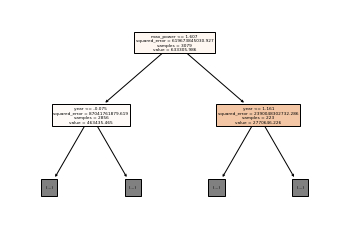

In [560]:
plot_tree(model[0], feature_names=train_inputs.columns, max_depth=1, filled=True);

In [561]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

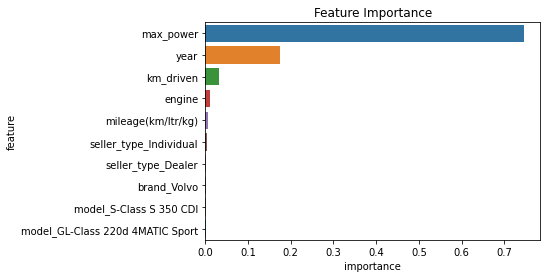

In [562]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Saving the Model

In [563]:
import joblib

In [564]:
data = {
    'model': model,
    'scaler': scaler,
    'input_cols': inputs,
    'target_col': output,
    'numeric_cols': numerics,
    'encoded_cols': encoded_cols
}

In [565]:
joblib.dump(data, 'dt_reg_car_sales.joblib')

['dt_reg_car_sales.joblib']

In [566]:
car_sales_dt_reg = joblib.load('dt_reg_car_sales.joblib')

In [567]:
test_preds2 = car_sales_dt_reg['model'].predict(test_inputs)
mse(test_target, test_preds2,squared=False)

193028.67936987197

In [568]:
r2_score(test_target, test_preds)

0.9431564370372026